<a href="https://colab.research.google.com/github/Navaneethp0/Deep-Learning/blob/main/Cat_Dog_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_datagen=ImageDataGenerator(rescale = 1./255,
                                 shear_range  = 0.2,
                                 zoom_range = 0.2,
                                 horizontal_flip = True)

In [ ]:
training_set=train_datagen.flow_from_directory("/content/drive/MyDrive/CNN DATA/train",
                                               target_size = (150,150),
                                               batch_size = 32,
                                               class_mode='binary'
                                               )



Found 414 images belonging to 2 classes.


In [ ]:
# load a test image for visualization purposes
test_image = np.random.rand(150,150,3)

In [ ]:
# choose an image from the training set
img_path = "/content/drive/MyDrive/CNN DATA/train/cat/cat.113.jpg"

(1, 150, 150, 3)


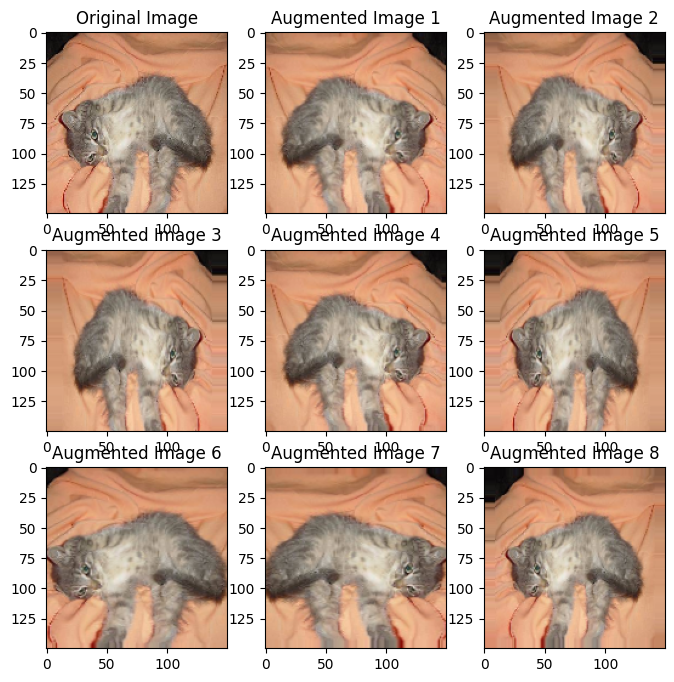

In [ ]:
# load and display the original image
img= image.load_img(img_path,target_size=(150,150))
plt.figure(figsize=(8,8))
plt.subplot(3,3,1)
plt.imshow(img)
plt.title('Original Image')
img=image.img_to_array(img)
img=img.reshape((1,) + img.shape)
print(img.shape)

# Generate augmented image and display them

i = 2
for batch in train_datagen.flow(img, batch_size=1):
    plt.subplot(3, 3, i)
    plt.imshow(image.array_to_img(batch[0]))
    plt.title('Augmented Image {}'.format(i-1))
    i += 1
    if i > 9:
        break  # Break after displaying 8 augmented images

plt.show()






In [ ]:
test_datagen= ImageDataGenerator(rescale = 1./255)
test_set=test_datagen.flow_from_directory(directory="/content/drive/MyDrive/CNN DATA/test",
                                          target_size = (150,150),
                                          batch_size = 32,
                                          class_mode = "binary")

Found 414 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dropout,Flatten,Dense,Activation,BatchNormalization
from tensorflow.keras.optimizers import Adam

In [ ]:
IMAGE_WIDTH=150
IMAGE_HEIGHT=150
IMAGE_SIZE=(IMAGE_WIDTH,IMAGE_HEIGHT)
IMAGE_CHANNELS=3 # for colored Images and 1 for Grayscale Images
BATCH_SIZE=32
EPOCHS=20

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS),name='Conv1'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), name='Pool1'))


model.add(Conv2D(64, (3, 3), activation='relu', name='Conv2'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),name='Pool2'))

model.add(Conv2D(64, (3, 3), activation='relu', name='Conv3'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),name='Pool3'))

model.add(Conv2D(64, (3, 3), activation='relu', name='Conv4'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),name='Pool4'))

# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2)))

# flatten is used to convert the multi dimensional output from the previous layer into a one dimensional array
model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(1, activation='sigmoid'))

In [ ]:
optimizer = Adam(0.001)

In [ ]:
model.compile(loss='binary_crossentropy',)

In [ ]:
model.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1 (Conv2D)              (None, 148, 148, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 148, 148, 32)      128       
 Normalization)                                                  
                                                                 
 Pool1 (MaxPooling2D)        (None, 74, 74, 32)        0         
                                                                 
 Conv2 (Conv2D)              (None, 72, 72, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 72, 72, 64)        256       
 chNormalization)                                                
                                                                 
 Pool2 (MaxPooling2D)        (None, 36, 36, 64)        0

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
earlystop=EarlyStopping(patience=10)
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_accuracy',
                                            patience=2,
                                            verbose=1,
                                            factor=0.1,
                                            min_lr=0.00001)
callbacks=[earlystop,learning_rate_reduction]

In [ ]:
%%time
# running time
hist=model.fit(training_set,
               epochs=EPOCHS,
               validation_data=test_set,
               callbacks=callbacks
)

Epoch 1/20
13/13 [==============================] - 204s 16s/step - loss: 0.9302 - accuracy: 0.5845 - val_loss: 0.7194 - val_accuracy: 0.5121 - lr: 0.0010
Epoch 2/20
13/13 [==============================] - 7s 531ms/step - loss: 0.7423 - accuracy: 0.6425 - val_loss: 0.8254 - val_accuracy: 0.5121 - lr: 0.0010
Epoch 3/20
13/13 [==============================] - ETA: 0s - loss: 0.6282 - accuracy: 0.7174
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
13/13 [==============================] - 6s 453ms/step - loss: 0.6282 - accuracy: 0.7174 - val_loss: 0.8228 - val_accuracy: 0.5121 - lr: 0.0010
Epoch 4/20
13/13 [==============================] - 6s 438ms/step - loss: 0.5674 - accuracy: 0.7512 - val_loss: 1.0902 - val_accuracy: 0.5121 - lr: 1.0000e-04
Epoch 5/20
13/13 [==============================] - ETA: 0s - loss: 0.4280 - accuracy: 0.7923
Epoch 5: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
13/13 [==============================] - 6s 4

In [ ]:
model.save('my_model.keras')


In [ ]:
results=model.evaluate(test_set)


13/13 [==============================] - 2s 133ms/step - loss: 1.7267 - accuracy: 0.5121


In [ ]:
print("loss:",results[0])
print("Accuracy:",results[1])

loss: 1.7266502380371094
Accuracy: 0.512077271938324


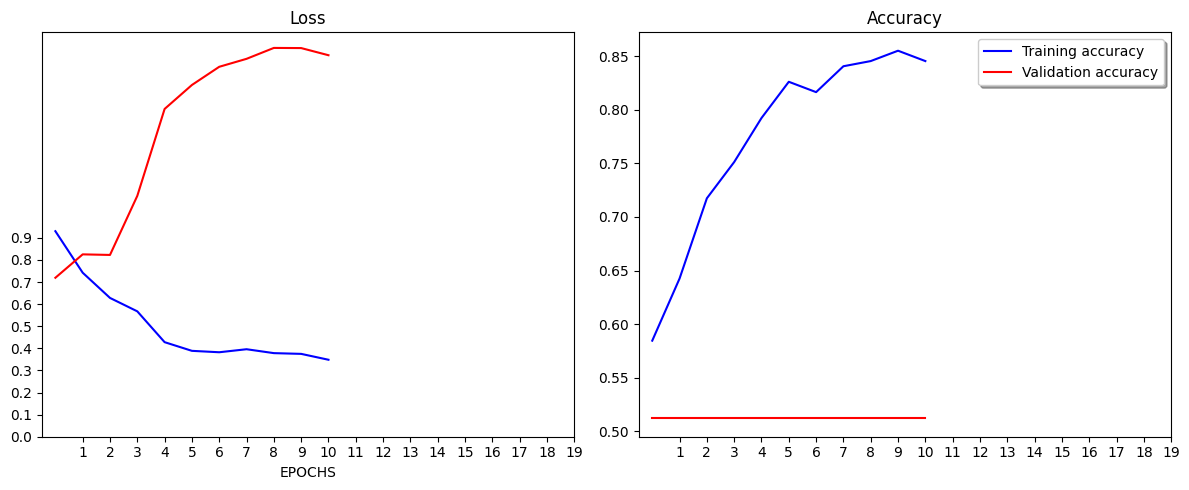

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.plot(hist.history['loss'], color='b', label="Training loss")
ax1.plot(hist.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, EPOCHS, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))
ax1.set_xlabel("EPOCHS")
ax1.set_title("Loss")

ax2.plot(hist.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(hist.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, EPOCHS, 1))
ax1.set_xlabel("EPOCHS")
ax2.set_title("Accuracy")

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

/bin/bash: line 1: conda: command not found


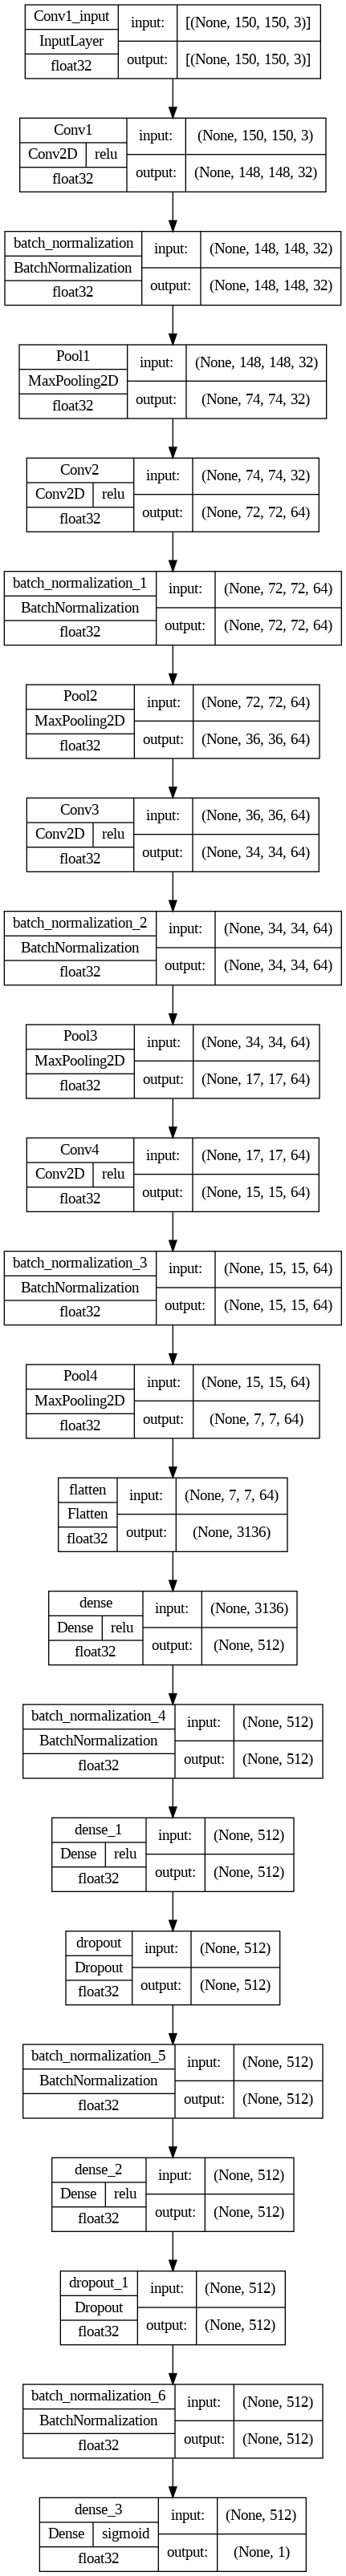

In [ ]:
!pip3 install pydot
!pip3 install graphviz
!conda install graphviz
from tensorflow.keras.utils import plot_model

plot_model(
    model,
    show_shapes=True,
    show_dtype=True,
    show_layer_activations=True
)

## Testing with new data

In [ ]:
import numpy as np
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.models import load_model
test_image = load_img('/content/drive/MyDrive/CNN DATA/test/dog/dog.10.jpg',target_size=(150,150))
cnn_model=load_model('my_model.keras')

In [ ]:
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn_model.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

print(prediction)

1/1 [==============================] - 0s 463ms/step
dog
